# Reconnaissance des chiffres de MNIST en suivant le tutoriel du site de Tensorflow

In [1]:
import tensorflow as tf
import numpy as np
print("TensorFlow version:", tf.__version__)
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("# GPUs Available: ", len(physical_devices))
if len(physical_devices) > 0:
   tf.config.experimental.set_memory_growth(physical_devices[0], True)

2023-05-14 11:49:15.001673: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


TensorFlow version: 2.4.1
# GPUs Available:  1


2023-05-14 11:49:16.114711: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-05-14 11:49:16.115300: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-05-14 11:49:16.128692: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-14 11:49:16.128966: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 with Max-Q Design computeCapability: 7.5
coreClock: 1.155GHz coreCount: 14 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 149.04GiB/s
2023-05-14 11:49:16.128992: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-05-14 11:49:16.130612: I tensorflow/stream_ex

In [6]:
!kaggle competitions download -c digit-recognizer

 78%|█████████████████████████████▊        | 12.0M/15.3M [00:00<00:00, 42.5MB/s]
100%|██████████████████████████████████████| 15.3M/15.3M [00:00<00:00, 37.9MB/s]


In [3]:
!tar  -xf digit-recognizer.zip

Importer avec les fichiers du site de Yann Le Cun directement (fonction de ChatGPT)

In [2]:
import gzip

def read_idx(filename):
    with gzip.open(filename, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), byteorder='big')
        data_type = ''
        if magic_number == 2051:
            data_type = 'images'
        elif magic_number == 2049:
            data_type = 'labels'
        else:
            print("Invalid magic number!")
            return None
        num_items = int.from_bytes(f.read(4), byteorder='big')
        if data_type == 'images':
            num_rows = int.from_bytes(f.read(4), byteorder='big')
            num_cols = int.from_bytes(f.read(4), byteorder='big')
            data = np.frombuffer(f.read(), dtype=np.uint8)
            data = data.reshape((num_items, num_rows * num_cols))
        else:
            data = np.frombuffer(f.read(), dtype=np.uint8)
        return data

# Read the MNIST training data
x_train = read_idx('train-images-idx3-ubyte.gz')
y_train = read_idx('train-labels-idx1-ubyte.gz')
x_test = read_idx('t10k-images-idx3-ubyte.gz')
y_test = read_idx('t10k-labels-idx1-ubyte.gz')

# Convert to numpy arrays
x_train = np.array(x_train, dtype=np.float32) 
y_train = np.array(y_train, dtype=np.int64)

x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.int64)


# reshape and rescale
x_train = x_train.reshape((-1, 28, 28)) / 255.0
x_test  = x_test.reshape((-1, 28, 28))  / 255.0

Ou bien importer avec l'API de Keras

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

Number of original training examples: 60000
Number of original test examples: 10000


In [9]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
    
    
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

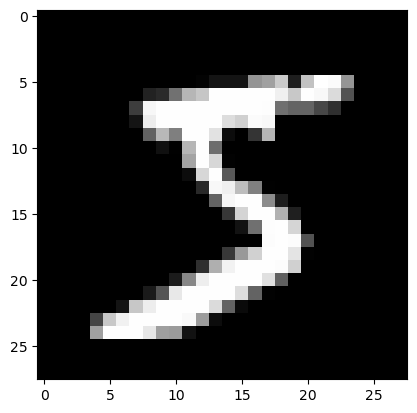

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap='Greys_r')

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10)
])

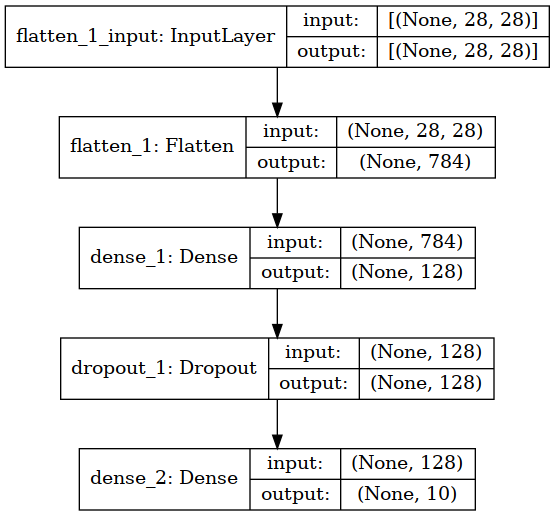

In [12]:
plot_model(model, show_shapes=True)

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001), # 'adam'
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()], # 'accuracy'
)

In [14]:
predictions = model.predict(x_train[:1])

In [15]:
tf.nn.softmax(predictions).numpy()

array([[0.06434415, 0.0735589 , 0.14943978, 0.09052154, 0.11391475,
        0.08349895, 0.04870129, 0.1497138 , 0.11184924, 0.11445753]],
      dtype=float32)

In [16]:
model.fit(x_train, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 2s 935us/step - loss: 0.4548 - sparse_categorical_accuracy: 0.8688
Epoch 2/6
1875/1875 [==============================] - 2s 915us/step - loss: 0.1385 - sparse_categorical_accuracy: 0.9589
Epoch 3/6
1875/1875 [==============================] - 2s 943us/step - loss: 0.0964 - sparse_categorical_accuracy: 0.9713
Epoch 4/6
1875/1875 [==============================] - 2s 932us/step - loss: 0.0715 - sparse_categorical_accuracy: 0.9776
Epoch 5/6
1875/1875 [==============================] - 2s 955us/step - loss: 0.0582 - sparse_categorical_accuracy: 0.9817
Epoch 6/6
1875/1875 [==============================] - 2s 940us/step - loss: 0.0476 - sparse_categorical_accuracy: 0.9848


In [9]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0794 - sparse_categorical_accuracy: 0.9759


[0.0794185921549797, 0.9758999943733215]

## Avec un réseau de convolution

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(28,28,1)),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

2023-05-14 11:49:22.428220: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-14 11:49:22.428713: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-05-14 11:49:22.428941: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-14 11:49:22.429148: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 with Max-Q Design computeCapability: 7.5
coreClock: 1.155GHz coreCount: 14 deviceMemorySize: 3.81GiB deviceMemory

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)



2023-05-14 11:49:23.993670: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-05-14 11:49:23.994571: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499950000 Hz


Epoch 1/15


2023-05-14 11:49:24.335454: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-05-14 11:49:24.532088: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


422/422 [==============================] - 4s 6ms/step - loss: 0.7803 - accuracy: 0.7527 - val_loss: 0.0805 - val_accuracy: 0.9787
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1259 - accuracy: 0.9623 - val_loss: 0.0543 - val_accuracy: 0.9857
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0893 - accuracy: 0.9726 - val_loss: 0.0497 - val_accuracy: 0.9872
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0742 - accuracy: 0.9778 - val_loss: 0.0421 - val_accuracy: 0.9895
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0662 - accuracy: 0.9798 - val_loss: 0.0392 - val_accuracy: 0.9902
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0545 - accuracy: 0.9836 - val_loss: 0.0361 - val_accuracy: 0.9902
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0524 - accuracy: 0.9840 - val_loss: 0.0351 - val_accuracy: 0.9912
Epoch 8/15
422/42

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.026792505756020546
Test accuracy: 0.9907000064849854


In [17]:
x_train[0].shape

(28, 28, 1)

In [19]:
model.predict(x_train[:1,:,:,:])

array([[3.54352203e-12, 1.37031263e-11, 6.31960817e-10, 7.77337118e-04,
        6.03681737e-14, 9.99220252e-01, 7.85133352e-13, 6.37651842e-09,
        2.22783001e-06, 1.11275874e-07]], dtype=float32)

In [14]:
x_train[1,:,:,:].shape

(28, 28, 1)

In [22]:
import numpy as np
from PIL import Image

# Define the path where the images are stored
path = "/home/matthias/Downloads/images/"

# Create an empty numpy array to store the images
images = np.empty((1000, 28, 28, 1))

# Load each image and add it to the numpy array
for i in range(1000):
    img = Image.open(path + str(i) + ".jpg")
    img = img.convert("L")  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to (28, 28)
    img_arr = np.array(img)  # Convert to numpy array
    img_arr = img_arr.reshape((28, 28, 1))  # Add channel dimension
    images[i] = img_arr

# Print the shape of the numpy array
print(images.shape)

(1000, 28, 28, 1)


In [26]:
res = model.predict(images)
res = res.argmax(axis=1)

In [41]:
parity = [x%2 for x in res]

In [43]:
binary_string = ''.join(str(x) for x in parity)

In [44]:
# Convert the binary string to an integer
int_val = int(binary_string, 2)

# Convert the integer to text using the chr() function
text_str = chr(int_val)

# Print the result
print(text_str)

OverflowError: Python int too large to convert to C int